In [11]:
import json
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [12]:
# load json
with open('training_data.json', 'r', encoding='utf-8') as infile:
    json_items = json.loads(infile.read())

item_values = []

for item in json_items:
    item_class = item['class']
    text = item['text']
    punctuation_after_first_word = item['punctuation_after_first_word']
    square_bracket = item['square_bracket']
    square_bracket_with_punctuation = item['square_bracket_with_punctuation']
    parentheses = item['parentheses']
    parentheses_with_punctuation = item['parentheses_with_punctuation']
    category_word = item['category_word']
    first_word_frequency = item['first_word_frequency']
    values = [
        item_class, 
        text, 
        punctuation_after_first_word, 
        square_bracket, 
        square_bracket_with_punctuation, 
        parentheses, parentheses_with_punctuation,
        category_word, 
        first_word_frequency,
            ]
    item_values.append(values)

print(item_values[:5])

[[1, 'A är den första bokstafven i det vanliga europeisk-latinska alfabetet. Dess äldsta kända, semitisk-moabitiska, form är [*]; äldre grekiska alfabet hafva mest [*] eller [*], men äfven A; i itali', 0, 0, 0, 0, 0, 0, 0.22420931634042363], [0, 'Som a-ljud uppfattas flera vokaler. Så vokalen i sv. hatt och sv. hat, hvilka båda vokaler bildas genom höjning af bakre delen af tungan och utan egentligt deltagande af läpparna.', 0, 0, 0, 0, 0, 0, 0.28578443407807513], [0, 'Det indo-europeiska urspråket egde både kort och långt a-ljud. Det förra har i de germanska språken icke blott bevarats (t. ex. lat. vadere, sv. vada), utan äfven fått ett betydli', 0, 0, 0, 0, 0, 0, 0.11858022900252216], [0, 'Urspr. och ända till fram emot 11:te årh. var A äfven det musikaliska alfabetets första bokstaf, men i vår nuvarande diatoniska skala är det sjätte tonen. Efter den internationella kongr', 1, 0, 0, 0, 0, 0, 0.005563243532799143], [0, 'Såsom symboliskt tecken har A en vidsträckt användning och betyd

In [13]:
# convert to feature matrix and y vector
# all key-value pairs should be included except for text
# class becomes the y vector
X = np.array([])
y = np.array([])

for values in item_values:
    X = np.vstack([X, values[2:]]) if X.size else np.array(values[2:])
    y = np.append(y, values[0])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(X.shape)
print(y.shape)

(109219, 7)
(109219,)


[[ 2.22495911  4.36903948  1.98894409  2.30577337  0.09016072  1.72584676
  21.4209656 ]]
Accuracy: 0.897363120307636
Confustion matrix
[[ 1749  2071]
 [  171 17853]]


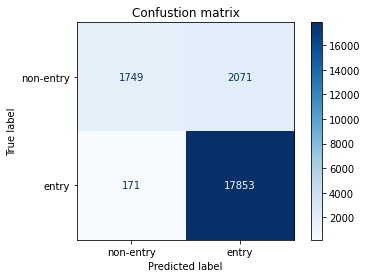

In [15]:
# Create a logistic regression model
logistic_regression_model = LogisticRegression()

# Fit the model to the training data
logistic_regression_model.fit(X_train, y_train)
print(np.abs(logistic_regression_model.coef_))

# Predict on the testing data
predictions = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy) 
# evaluate with f1-score, confusion matrix on test set

class_names = ["non-entry", "entry"]
title="Confusion matrix"
disp = ConfusionMatrixDisplay.from_estimator(
        logistic_regression_model,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        # normalize=normalize,
    )
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

In [6]:
# check the data that was misclassified

misclassified = y_test - predictions

non_zero_indices = [index for index, value in enumerate(misclassified) if value != 0]

hej = [np.append(X_test[i], predictions[i]) for i in non_zero_indices]
hej

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.16804236e-04, 1.00000000e+00]),
 array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.89347454e-05, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.94673727e-04, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.00159632, 1.        ]),
 array([1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00926647, 1.        ]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.61890671e-04, 1.00000000e+00]),
 array([1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02702071, 1.        ]),
 array([1.        , 0.        , 0.        , 0.        , 0.        ,
      

## Save the trained model to disk

In [16]:
joblib.dump(logistic_regression_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']